In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Lasso
import matplotlib as plt
import os

In [9]:
df = pd.read_csv(os.path.join(r"C:\Users\mohan\Machine-learning-models\datasets",'diabetes.csv'))

In [10]:
#cleaning and processing the data
features = df.drop("Outcome", axis=1)
target   = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [11]:
#fitting the model
knn_classifier = KNeighborsClassifier(n_neighbors = 6)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

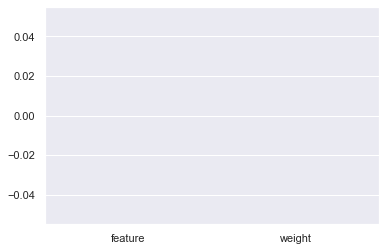

In [12]:
#highlighting the importance of each feature using lasso Regressor  
regessor = Lasso(alpha = 0.1)
coeffs = regessor.fit(X_train, y_train).coef_
data = {"pergenancy":coeffs[0], "glucose":coeffs[1], "Bloodpressure":coeffs[2], "Skin Thickness":coeffs[3], 
        "Insulin":coeffs[4], "BMI":coeffs[5], "DiabetesPedigreeFunction":coeffs[6], "Age":coeffs[7]}
dataframe = pd.DataFrame(data, columns = ["feature","weight"])
sns.set()
ax = sns.barplot(
        data=dataframe,
        palette=['blue', 'red', 'yellow', 'grey'],
        saturation=0.4,
    )